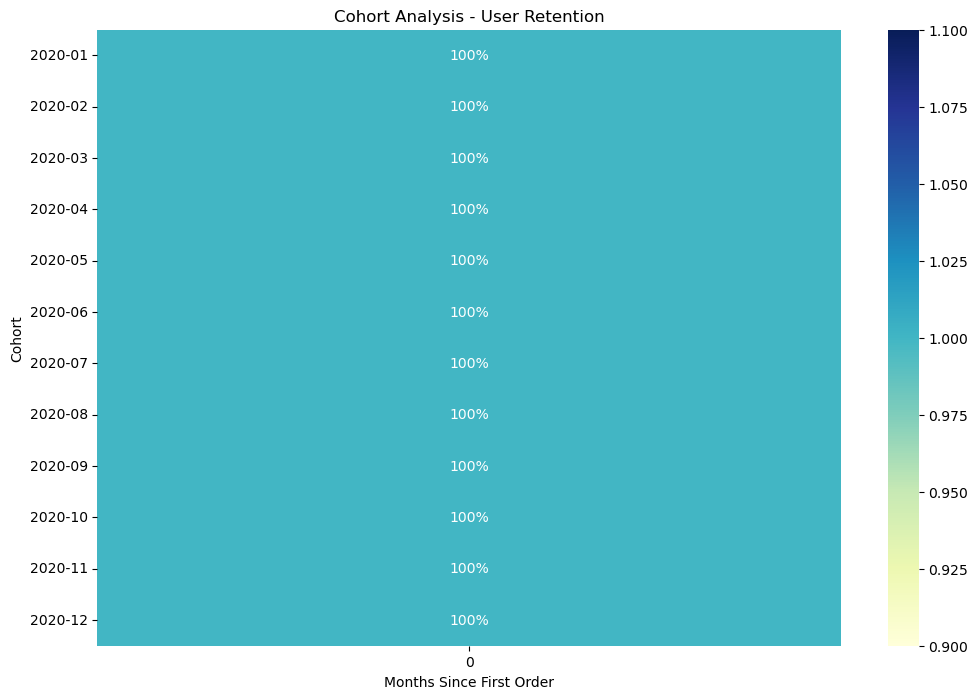

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_users = 1000
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')
user_ids = np.arange(1, n_users + 1)
order_dates = pd.date_range(start_date, end_date, periods=n_users)
revenue = np.random.randint(10, 100, n_users)

data = {
    'user_id': user_ids,
    'order_date': order_dates,
    'revenue': revenue
}
df = pd.DataFrame(data)

df['cohort'] = df.groupby('user_id')['order_date'].transform('min').dt.to_period('M')

df['cohort_period'] = (df['order_date'].dt.to_period('M') - df['cohort']).apply(lambda x: x.n)

cohort_counts = df.pivot_table(index='cohort', columns='cohort_period', values='user_id', aggfunc=pd.Series.nunique)
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)


plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - User Retention')
plt.ylabel('Cohort')
plt.xlabel('Months Since First Order')
plt.show()